# **California Median Housing Value Predictor**

Nickolas Winters

## Problem Framing & Big Picture

### Problem
This project aims to employ a machine learning algorithm to predict median houseing values in Californian districts, given a number of features from these districts. This model could be useful in aiding either sellers in properly listing a house or buyers in establishing a realistic price for a property.

### Framing the Problem
To address the proposed problem stated above, a supervised learning model was constructed. This path was chosen because the data was labeled, meaning that the key data points that the model was trying to predict (median housing value) was known and could be used to train and evaluate the model.

### Specific Machine Learning Task
The specific model created utilizes regression to predict the olutcome variable (median housing income). Regression was chosen because it deals with the prediction of numerical continuous data (in this case the outcome being the value of a house, which is numerical and can have a large range of values).

### Metrics Utilized for Performance
With regression being used, the means to evaluate the model was through the use of the following metrics:

    - root mean squared error (rmse): metric that portrays the square root of the average difference between a predicted value and the actual value.

## 1. Get the Data

### Common Imports
Below are the packages that were imported to successfully conduct this machine learning task. The packages are in order of use and are segmented by which step in the process they were utilized.

In [1]:
# General data manipulation and wrangling
import pandas as pd
import numpy as np
import sklearn

# Data visualization
import matplotlib.pyplot as plt

# Splitting data into training and test sets
from sklearn.model_selection import train_test_split

# Transforming data
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

# Model creation
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Model finetuning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Model evaluation
from sklearn.metrics import mean_squared_error

# saving the model
import joblib

In [2]:
# set random seed for reproducability
np.random.seed(42)

### Import the Data

The first step in this process involved importing the data and assigning it to an object for manipulation.

In [4]:
#Utilizing the pandas library, the pd.read_csv() function was used to load in the csv file 'student-mat'
#The csv file was then assigned to the object labeled 'housing'
housing = pd.read_csv('housing.csv')

## 2. Explore the Data

Before anything was done to the data, the data's size and attributes were investigated.

In [5]:
# view the columns and the first five rows
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
# notice total instances, counts in each column, and data types
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


The only string object in the data was the `ocean_proximity` variable; whereas the rest were floats or decimals. To continue the investigation these two different variables were looked at independently of eachother.

In [7]:
# check the ocean_proximity counts
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
# check the summary of the numerical attributes
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


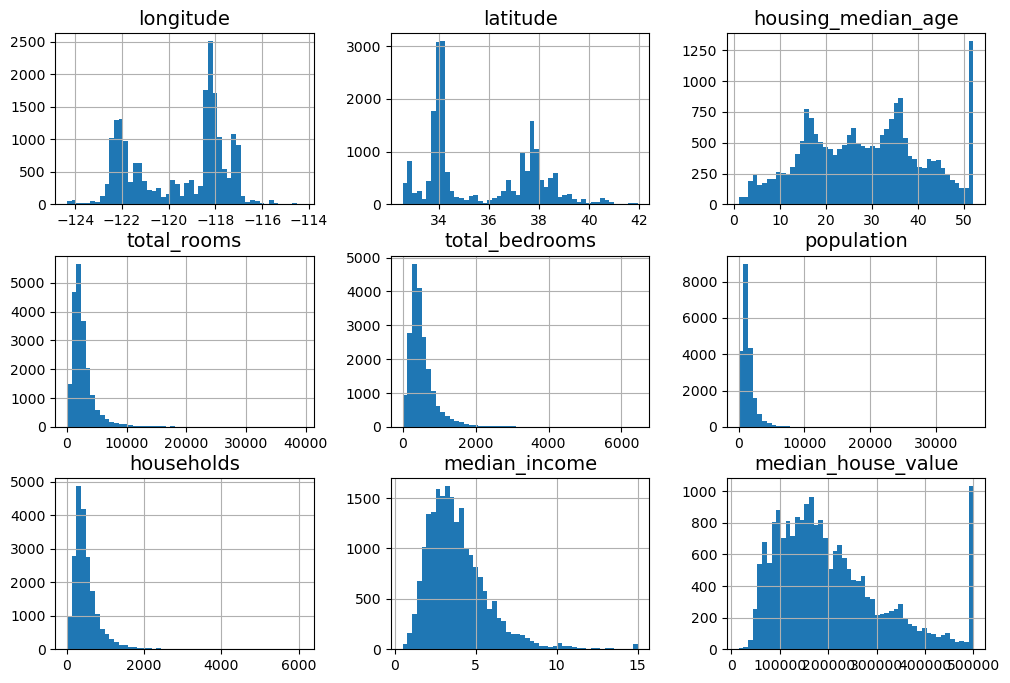

In [9]:
# The next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# plots histograms of numerical data
housing.hist(bins=50, figsize=(12, 8))
plt.show()

**Observation:**

1) The median income isn't expressed in US dollars
    - data has been scaled and capped at 15 (actually 15.0001) for higher incomes
    - data has been scaled and capped at 0.5 (actually 0.4999) for lower incomes    
&nbsp;

2) The housing median age and the housing median value were also capped (see tall bar at the end of the graph).
    - collect proper labels for districts that were capped
    - remove those districts from the training and test set  
&nbsp;  

3) These attributes have very different scales.  

4) Many of the histograms are skewed right.  
 

## 3. Correctly split the data into a training and test set

The next step involved splitting the data into a training set and a test set.

Below the housing data was slit up into two beased on features and label. The features were split into `X_train` and `X_test`, and the label data was split up into `y_train` and `y_test`. It is common practice to allocate 80% of the data to training and 20% of the data to testing.

### Random Sampling

In [10]:
# create an 80/20 split of the data
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [11]:
# view the training data
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.22,32.75,34.0,6001.0,1111.0,2654.0,1072.0,4.5878,291000.0,NEAR OCEAN
8267,-117.03,32.69,10.0,901.0,163.0,698.0,167.0,4.6648,156100.0,NEAR OCEAN
17445,-122.27,37.74,28.0,6909.0,1554.0,2974.0,1484.0,3.6875,353900.0,NEAR BAY
14265,-121.82,37.25,25.0,4021.0,634.0,2178.0,650.0,5.1663,241200.0,<1H OCEAN
2271,-115.98,33.32,8.0,240.0,46.0,63.0,24.0,1.4688,53800.0,INLAND


In [12]:
# view the test data
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-122.38,40.67,10.0,2281.0,444.0,1274.0,438.0,2.2120,65600.0,INLAND
3024,-118.37,33.83,35.0,1207.0,207.0,601.0,213.0,4.7308,353400.0,<1H OCEAN
15663,-117.24,32.72,39.0,3089.0,431.0,1175.0,432.0,7.5925,466700.0,NEAR OCEAN
20484,-118.44,34.05,18.0,4780.0,1192.0,1886.0,1036.0,4.4674,500001.0,<1H OCEAN
9814,-118.44,34.18,33.0,2127.0,414.0,1056.0,391.0,4.3750,286100.0,<1H OCEAN


### Stratified Sampling

The median income attribute is an important feature in the prediction of house prices.  To ensure that the test set is representative of the various categories of income a stratified sampling was used.

In [14]:

housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

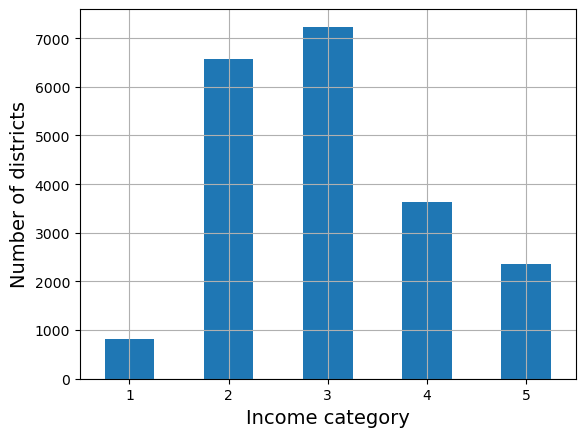

In [15]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

In [16]:
# stratified sampling train test split
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [17]:
# check income category proportions
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [18]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(housing),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(test_set),
}).sort_index()
compare_props.index.name = "Income Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Income Category,,,,,
1,3.98,4.00,4.24,0.36,6.45
2,31.88,31.88,30.74,-0.02,-3.59
3,35.06,35.05,34.52,-0.01,-1.53
4,17.63,17.64,18.41,0.03,4.42
5,11.44,11.43,12.09,-0.08,5.63


In [19]:
# drop the 'income_cat' attribute since it is no longer needed
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## 4. Visualize the Data
Next the training set was explored to gain insights into feature dynamics. 

In [20]:
# copy training data to the 'housing' variable
housing = strat_train_set.copy()

**Geographical Data**

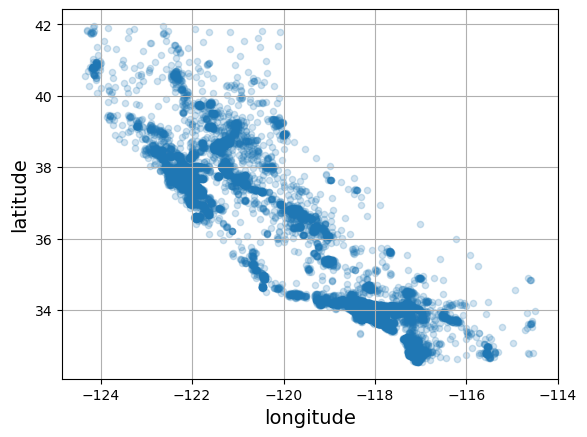

In [21]:
# setting the alpha allows for better density visualization
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

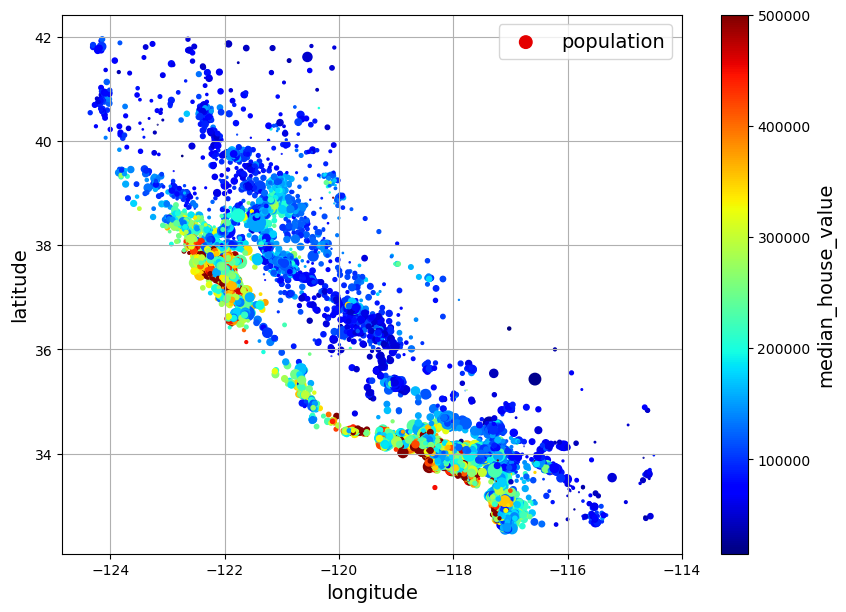

In [22]:
# radius(option s)- population
# color(option c)- price
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
plt.show()

## 5. Looking for Correlations
Computing the standard correlation coefficient between every pair of attributes was conducted to lend insight into feature importnace.

In [23]:
# Create list of numerical features
num_cols = ['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households',
            'median_income','median_house_value']

In [24]:
# compute correlations
corr_matrix = housing[num_cols].corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924213,-0.102937,0.044558,0.068210,0.104236,0.054261,-0.016542,-0.050859
latitude,-0.924213,1.000000,0.005692,-0.036753,-0.066391,-0.115677,-0.071604,-0.078137,-0.139584
housing_median_age,-0.102937,0.005692,1.000000,-0.361710,-0.317978,-0.301906,-0.300075,-0.127043,0.102175
total_rooms,0.044558,-0.036753,-0.361710,1.000000,0.930076,0.863967,0.916143,0.197720,0.137455
total_bedrooms,0.068210,-0.066391,-0.317978,0.930076,1.000000,0.886200,0.978822,-0.006038,0.054635
population,0.104236,-0.115677,-0.301906,0.863967,0.886200,1.000000,0.916237,0.004282,-0.020153
households,0.054261,-0.071604,-0.300075,0.916143,0.978822,0.916237,1.000000,0.013637,0.071426
median_income,-0.016542,-0.078137,-0.127043,0.197720,-0.006038,0.004282,0.013637,1.000000,0.688380
median_house_value,-0.050859,-0.139584,0.102175,0.137455,0.054635,-0.020153,0.071426,0.688380,1.000000


In [25]:
# check how much each attribute correlates with the median house value
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

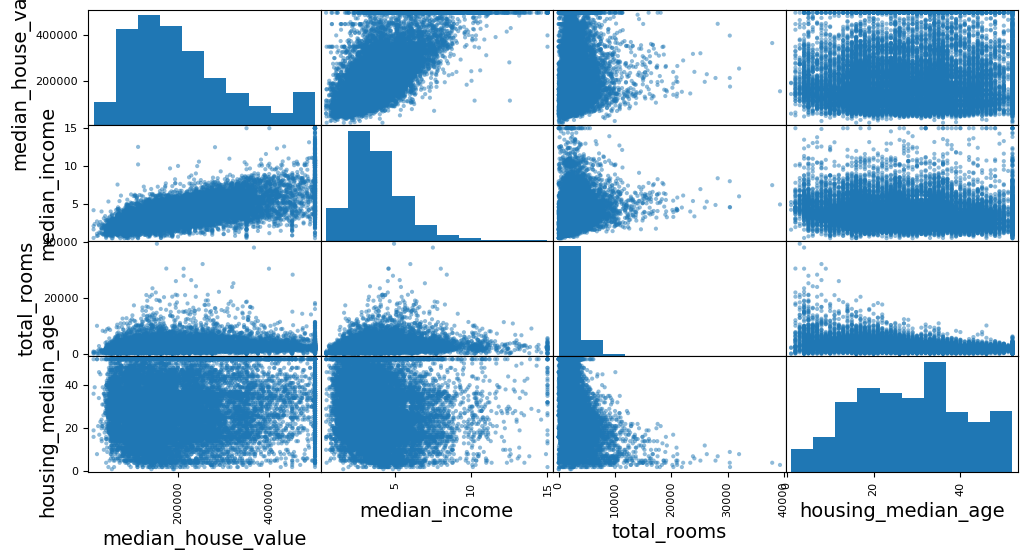

In [26]:
# plots every numerical attribute against every other numerical attribute
from pandas.plotting import scatter_matrix

# need to reduce attributes so that it fits on screen
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]

# plots scatterplots and histograms when variable is compared against itself
scatter_matrix(housing[attributes], figsize=(12, 6))
plt.show()

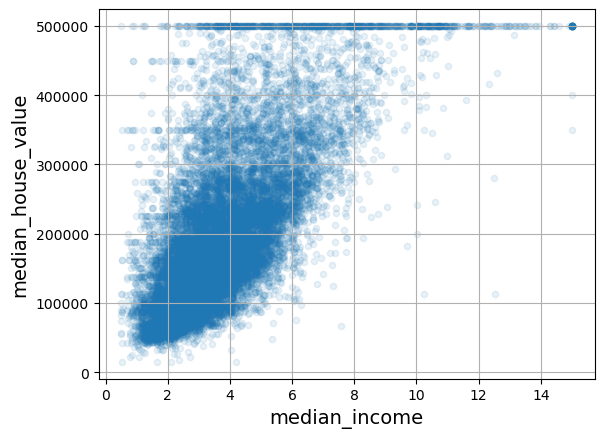

In [27]:
# most promising attribute to predict house prices
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1, grid=True)
plt.show()

**Observation:**

There was a noticably strong correlation between median income and a district's median house value.  It can also be seen that the horizontal line at $500,000 where the prices are capped along with lighter lines at various intervals in the plot. These corresponding districts may need to be removed to prevent the algorithm from trying to reproduce them.

### Experimenting with Attribute Combinations
Before preparing the data for machine learning algorithms, attribute combinations were created.

In [28]:
# rooms per household
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]

# bedrooms compared to number of rooms
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]

# population per household
housing["people_per_house"] = housing["population"] / housing["households"]

In [29]:
# check correlation matrix again with new attributes
num_cols_new_attr = ['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households',
            'median_income','median_house_value','rooms_per_house','bedrooms_ratio','people_per_house']

corr_matrix = housing[num_cols_new_attr].corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

**Observation:**

The `bedrooms_ratio` was more correlated than just looking at `total_bedrooms` alone.  Houses with lower bedroom to total rooms ratio tend to be less expensive.  
Also noticed that the `rooms_per_house` attribute was slightly more correlated than `total_rooms`.  The larger the houses, the more expensive they are.

## 6. Prepare the Data for Machine Learning Algorithms

Once exploration was conclued, the data was transformed to be more streamlined. This included conducting the following:

    - Feature selection 
    - Creating a custom transformer
    - Creating a pipeline to transform categorical data
    - Creating a pipeline to transform ordinal data
    - Creating a column transformer
    
As a preliminary, and to aid in transformation steps, the features that were going to be used for model creation were partinioned based on whether the varibales were numerical or categorical. These groups included:

    - Numerical: Quantitative data
    - Categorical: Data that represents a category
    - Ordinal: Data that can be ordered 

In [30]:
# features
housing = strat_train_set.drop("median_house_value", axis=1)

# label
housing_labels = strat_train_set["median_house_value"].copy()

### Custom Transformers

This transformer class combined attributes created above.

In [31]:
housing.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13096,-122.42,37.8,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY


In [32]:
# obtain list of column names
num_attribs = ['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households',
            'median_income']
cat_attribs = ["ocean_proximity"]

features_num = housing[num_attribs]

In [33]:
# column index
rooms_ix = features_num.columns.get_loc('total_rooms')
bedrooms_ix = features_num.columns.get_loc('total_bedrooms')
population_ix = features_num.columns.get_loc('population')
households_ix = features_num.columns.get_loc('households')

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None): # pipelines require the fit() method to have two arguments X and y; which is why we have y=None
        return self  # nothing else to do
    
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]


In [34]:
# instantiate the class
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)

# transform the housing values
housing_extra_attribs = attr_adder.transform(housing.values)

In [35]:
# just reviewing what the housing.values code will provide
housing.values[0]

array([-122.42, 37.8, 52.0, 3321.0, 1115.0, 1576.0, 1034.0, 2.0987,
       'NEAR BAY'], dtype=object)

In [36]:
# show that the two attributes were added
housing_extra_attribs[0]

array([-122.42, 37.8, 52.0, 3321.0, 1115.0, 1576.0, 1034.0, 2.0987,
       'NEAR BAY', 3.211798839458414, 1.5241779497098646], dtype=object)

In [37]:
# to veiw the new column as a dataframe
housing_extra_attribs_df = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)

housing_extra_attribs_df.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
13096,-122.42,37.8,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY,3.211799,1.524178


### Transformation Pipelines

Pipeline for the numerical attributes:

In [38]:
# numerical pipeline
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")), #takes list of name/estimator pairs
        ('attribs_adder', CombinedAttributesAdder()), #all but the last transformer must be transformers (have fit_transform method)
        ('std_scaler', StandardScaler()), #exposes the same methods as the final transformer (fit_transform) - could be predictor
    ])

In [39]:
# create full pipeline
preprocessing = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(drop='first'), cat_attribs),
    ])

housing_prepared = preprocessing.fit_transform(housing)

In [40]:
# check for transformations
housing_prepared[0]

array([-1.42303652,  1.0136059 ,  1.86111875,  0.31191221,  1.36816703,
        0.13746004,  1.39481249, -0.93649149, -0.86602737, -0.33020372,
        1.84662439,  0.        ,  0.        ,  1.        ,  0.        ])

## 7. Select and Train a Model

### Training and Evaluating on the Training Set

In [41]:
# Instantiate the liner regression model
lin_reg = LinearRegression()

# Fit the model to the preprocessed training data
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [42]:
# Instantiate the decision tree regression model
tree_reg = DecisionTreeRegressor(random_state=42)

# fit model to preprocessed training data
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [43]:
# instantiate randome forest regressor
forest_reg = RandomForestRegressor(random_state=42)

# fit model to training data
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

## 8. Evaluation Using Cross-Validation
Cross validation was used to determine how well the model will generialize to new data. This works by splitting the training data into multiple folds or parts, where for different iterations of evalutation, each part gets a turn to become the validation set or the set that is going to act as the actual for the generated predictions. 

In [44]:
# expects a utility function (greater is better) rather than a cost function (lower is better), 
# so the scoring function is actually the opposite of the RMSE. (notice negative sign)
lin_rmses = -cross_val_score(lin_reg, housing_prepared, housing_labels,
                              scoring="neg_root_mean_squared_error", cv=10)
np.mean(lin_rmses)

67994.06678091262

In [45]:
tree_rmses = -cross_val_score(tree_reg, housing_prepared, housing_labels,
                              scoring="neg_root_mean_squared_error", cv=10)
np.mean(tree_rmses)

70398.45855786013

In [46]:
forest_rmses = -cross_val_score(forest_reg, housing_prepared, housing_labels,
                              scoring="neg_root_mean_squared_error", cv=10)
np.mean(forest_rmses)

49575.78687742332

**Observation:** Out of the three models, the random forest regressor had the least amount of error. Because of this the random forest model was used in the following steps.

## 9. Fine-Tune the Model

## Grid Search

`GridSearchCV()` was employed to search for the best hyperparameters.

In [48]:
# setup the hyperparameter values to search - we'll learn more about these later
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, # 3 x 4 combinations
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3,4]} # 2 x 3 combinations (total of 18 combinations tried)
]

# instantiate model
forest_reg = RandomForestRegressor(random_state=42)

# instantiate grid search
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)

# run grid search
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

The best hyperparameter combination found:

In [49]:
# display the best parameters
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [50]:
# display the best parameters
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30, random_state=42)

## 9. Analyze the Best Models and Their Errors

In [51]:
# checking the feature importance scores
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([8.55891800e-02, 7.42280274e-02, 4.17317702e-02, 1.64563554e-02,
       1.59574364e-02, 1.63330455e-02, 1.57560056e-02, 3.20769240e-01,
       5.16965210e-02, 1.11181557e-01, 9.56764031e-02, 1.44811056e-01,
       1.65089547e-04, 4.55713029e-03, 5.09118192e-03])

In [52]:
# displays scores next to their attribute names
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = preprocessing.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.32076923985079364, 'median_income'),
 (0.144811056227849, '<1H OCEAN'),
 (0.11118155740809295, 'pop_per_hhold'),
 (0.09567640313266919, 'bedrooms_per_room'),
 (0.08558918004140273, 'longitude'),
 (0.07422802739806919, 'latitude'),
 (0.051696521044957804, 'rooms_per_hhold'),
 (0.041731770168467644, 'housing_median_age'),
 (0.016456355418925785, 'total_rooms'),
 (0.016333045543768163, 'population'),
 (0.01595743641960922, 'total_bedrooms'),
 (0.015756005588830627, 'households'),
 (0.0050911819226998395, 'NEAR BAY'),
 (0.0045571302865969445, 'ISLAND'),
 (0.00016508954726723646, 'INLAND')]

## 10. Evaluate Model on the Test Set

Once the model has been tuned, it was fit to the test set for final evaluation.

In [56]:
# set final model
final_model = grid_search.best_estimator_

# separate features and labels in test set
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

# transform test set features -- DO NOT USE fit_transform
X_test_prepared = preprocessing.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse) # slightly worse than our grid search RMSE which is to be expected

49619.50214050907


/Users/nickwinters/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## 11. Save and Deploy Model using joblib

Save the final model:

In [57]:
# save model as a pkl file
joblib.dump(final_model, "my_california_housing_model.pkl")

['my_california_housing_model.pkl']

Deploy model to production.

In [58]:
# reload the model from the pkl file
final_model_reloaded = joblib.load("my_california_housing_model.pkl")

# create new data
new_data = preprocessing.transform(housing.iloc[:5])  # pretend these are new districts
predictions = final_model_reloaded.predict(new_data)
predictions

array([414216.73333333, 471346.73333333, 100373.33333333,  99406.66666667,
       370276.76666667])